# 📊 Storytelling: Padrões de Consumo de Café – 2024/2025

## 🔎 Pergunta Geral
Como os padrões de consumo de café variam ao longo do dia, da semana e dos meses? Existem horários de pico previsíveis que podem orientar estratégias operacionais?





## 💡 Hipótese

 O consumo de café não é homogêneo: espera-se concentração em horários específicos (manhã e tarde), maior movimento em dias úteis, queda nos finais de semana e sazonalidade mensal, impactando diretamente o planejamento de estoque e pessoal.

## 🚀 Processo de Storytelling

1. Explorar

- Por hora do dia: O maior volume de vendas ocorre entre 8h e 11h, com destaque para 10h (pico absoluto), confirmando a relevância do café da manhã e do intervalo matinal. Há também um segundo movimento relevante no período da tarde, em torno das 16h.

- Por dia da semana: As vendas são mais fortes entre segunda e sexta-feira, especialmente na terça-feira (572 vendas) e na sexta-feira (532 vendas). Aos finais de semana, há queda significativa, sendo o domingo (419 vendas) o dia mais fraco.

- Por mês: Há crescimento gradual em 2024, com destaque para setembro e outubro (picos acima de 340 e 420 vendas), sugerindo sazonalidade positiva nesse período. Em 2025, janeiro já mostra retomada expressiva, com fevereiro ultrapassando 400 vendas, indicando força sazonal no início do ano também.

2. Construir

- Introdução: O consumo de café segue padrões previsíveis que podem guiar decisões estratégicas.

- Desenvolvimento: A análise mostra picos claros no meio da manhã e no meio da tarde, além de maior força de vendas em dias úteis.

- Clímax: O domingo e horários fora do padrão representam pontos de atenção, podendo impactar negativamente o faturamento.

- Conclusão: Estratégias de estoque, marketing e gestão de equipe devem considerar os picos horários e a queda nos finais de semana.

3. Apresentar

- Visualizações revelam claramente dois picos diários (10h e 16h).

- Linha semanal mostra a curva decrescente nos finais de semana.

- Gráfico mensal indica sazonalidade positiva em setembro/outubro e fevereiro.


## 🌍 Fatores Externos

Público: Donos de cafeterias, gestores de restaurantes e equipes de operação.

Cenário: Negócio altamente dependente de fluxo diário e sazonalidade, onde decisões operacionais afetam diretamente custos e margens.

Meio: Reunião gerencial com apoio visual dos gráficos, ressaltando picos de consumo e oportunidades de ajuste.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns
import numpy as np
import calendar
import datetime

## Preparando os dados 

- Ajustamos os tipos de dados ( ex: date → datetime, hour_of_day → int).
- Corrigimos valores nulos em time com base em hour_of_day.
- Criação de tabelas para melhor análise (_year, _month, _day, seasson, seasson_astro)
- Correção de posição de colunas para melhor visualização
- Limite de eixo Y quando necessário (ex.: ax.set_ylim(0, 580))


In [3]:
#AGORA VAMOS CARREGAR OS DADOS DO ARQUIVO
df = pd.read_csv("Coffe_sales_tratado3.csv")

In [4]:
#IREMOS VERFICAR SE FOI BEM CARREGADO, USANDO O HEAD

df.head()

,hour_of_day,cash_type,money,coffee_name,time_of_day,weekdaysort,weekday,monthsort,month_name,date,time,_year,_month,_day,season,season_astro
0,10,card,38.7,Latte,Morning,5,Friday,3,March,2024-03-01,2025-09-25 10:15:50.520,2024,3,1,Spring,Winter
1,12,card,38.7,Hot Chocolate,Afternoon,5,Friday,3,March,2024-03-01,2025-09-25 12:19:22.539,2024,3,1,Spring,Winter
2,12,card,38.7,Hot Chocolate,Afternoon,5,Friday,3,March,2024-03-01,2025-09-25 12:20:18.089,2024,3,1,Spring,Winter
3,13,card,28.9,Americano,Afternoon,5,Friday,3,March,2024-03-01,2025-09-25 13:46:33.006,2024,3,1,Spring,Winter
4,13,card,38.7,Latte,Afternoon,5,Friday,3,March,2024-03-01,2025-09-25 13:48:14.626,2024,3,1,Spring,Winter


In [5]:
#AGORA IREMOS USAR O INFO() PARA UMA ANALISE MAIS APRIMORADA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hour_of_day   3547 non-null   int64  
 1   cash_type     3547 non-null   object 
 2   money         3547 non-null   float64
 3   coffee_name   3547 non-null   object 
 4   time_of_day   3547 non-null   object 
 5   weekdaysort   3547 non-null   int64  
 6   weekday       3547 non-null   object 
 7   monthsort     3547 non-null   int64  
 8   month_name    3547 non-null   object 
 9   date          3547 non-null   object 
 10  time          3539 non-null   object 
 11  _year         3547 non-null   int64  
 12  _month        3547 non-null   int64  
 13  _day          3547 non-null   int64  
 14  season        3547 non-null   object 
 15  season_astro  3547 non-null   object 
dtypes: float64(1), int64(6), object(9)
memory usage: 443.5+ KB


In [6]:
#ESTATISTICAS BASICAS

df.describe(include="all")

,hour_of_day,cash_type,money,coffee_name,time_of_day,weekdaysort,weekday,monthsort,month_name,date,time,_year,_month,_day,season,season_astro
count,3547.000000,3547,3547.000000,3547,3547,3547.000000,3547,3547.000000,3547,3547,3539,3547.000000,3547.000000,3547.000000,3547,3547
unique,NaN,1,NaN,8,3,NaN,7,NaN,12,381,3539,NaN,NaN,NaN,4,4
top,NaN,card,NaN,Americano with Milk,Afternoon,NaN,Tuesday,NaN,March,2024-10-11,2025-09-25 10:15:50.520,NaN,NaN,NaN,Autumn,Winter
freq,NaN,3547,NaN,809,1205,NaN,572,NaN,494,26,1,NaN,NaN,NaN,1029,1104
mean,14.185791,NaN,31.645216,NaN,NaN,3.845785,NaN,6.453905,NaN,NaN,NaN,2024.265858,6.453905,15.578517,NaN,NaN
std,4.234010,NaN,4.877754,NaN,NaN,1.971501,NaN,3.500754,NaN,NaN,NaN,0.441852,3.500754,8.649059,NaN,NaN
min,6.000000,NaN,18.120000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,2024.000000,1.000000,1.000000,NaN,NaN
25%,10.000000,NaN,27.920000,NaN,NaN,2.000000,NaN,3.000000,NaN,NaN,NaN,2024.000000,3.000000,8.000000,NaN,NaN
50%,14.000000,NaN,32.820000,NaN,NaN,4.000000,NaN,7.000000,NaN,NaN,NaN,2024.000000,7.000000,16.000000,NaN,NaN
75%,18.000000,NaN,35.760000,NaN,NaN,6.000000,NaN,10.000000,NaN,NaN,NaN,2025.000000,10.000000,23.000000,NaN,NaN


In [7]:
#AGORA FAREI UMA PADRONIZAÇÃO DOS DADOS PARA FICAR TODOS EM MINUSCULOS E SEM ESPAÇOS, EVITANDO UM PROBLEMA FUTURO NO TRATAMENTO DE DADOS

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [8]:
df.head()

,hour_of_day,cash_type,money,coffee_name,time_of_day,weekdaysort,weekday,monthsort,month_name,date,time,_year,_month,_day,season,season_astro
0,10,card,38.7,Latte,Morning,5,Friday,3,March,2024-03-01,2025-09-25 10:15:50.520,2024,3,1,Spring,Winter
1,12,card,38.7,Hot Chocolate,Afternoon,5,Friday,3,March,2024-03-01,2025-09-25 12:19:22.539,2024,3,1,Spring,Winter
2,12,card,38.7,Hot Chocolate,Afternoon,5,Friday,3,March,2024-03-01,2025-09-25 12:20:18.089,2024,3,1,Spring,Winter
3,13,card,28.9,Americano,Afternoon,5,Friday,3,March,2024-03-01,2025-09-25 13:46:33.006,2024,3,1,Spring,Winter
4,13,card,38.7,Latte,Afternoon,5,Friday,3,March,2024-03-01,2025-09-25 13:48:14.626,2024,3,1,Spring,Winter


In [12]:
#AGORA FAREI UMA PADRONIZAÇÃO DOS DADOS PARA FICAR TODOS EM MINUSCULOS E SEM ESPAÇOS, EVITANDO UM PROBLEMA FUTURO NO TRATAMENTO DE DADOS

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


#PERCEBI QUE A DATA E O TIME NÃO ESTÃO EM DATETIME, ENTAO VOU CORRIGIR ESSE ERRO. PQ SO ASSIM VOU CONSEGUIR MANIPULAR ESSES DADOS.
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

if "time" in df.columns:
    df["time"] = pd.to_datetime(df["time"], errors="coerce")

       # Preenche valores vazios usando hour_of_day
    df["time"] = df.apply(
        lambda row: datetime.time(row["hour_of_day"], 0, 0) if pd.isna(row["time"]) else row["time"],
        axis=1
    )

# Tratando colunas Objetos para Strings
cols_str = ["cash_type", "coffee_name", "time_of_day", "weekday", "month_name", "season"]

for c in cols_str:
    if c in df.columns:
        df[c] = df[c].astype("string") 
    else:
        print(f"Atenção: coluna '{c}' não encontrada no DataFrame.")

# Remover espaços extras nas strings
for c in cols_str:
    if c in df.columns:
        df[c] = df[c].str.strip()

In [10]:
#VERIFICAR SE EXISTE VALOR NULO

df.isnull().sum()

hour_of_day     0
cash_type       0
money           0
coffee_name     0
time_of_day     0
weekdaysort     0
weekday         0
monthsort       0
month_name      0
date            0
time            0
_year           0
_month          0
_day            0
season          0
season_astro    0
dtype: int64

## 📈 Visualização inicial



Vendas por hora de todos os dias:

    hour_of_day  Quantidade
0            10         328
1            11         283
2            16         278
3             9         242
4            12         241
5            17         237
6            15         236
7             8         235
8            19         229
9            14         225
10           13         225
11           18         218
12           21         195
13           20         169
14           22         113
15            7          88
16            6           5


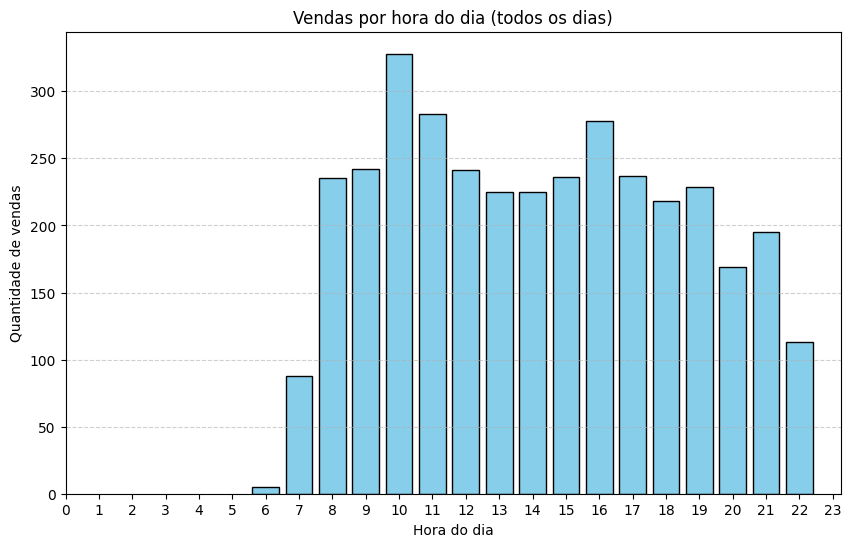

In [280]:
#AGORA VAMOS ANALISAR OS PADRÕES DE CONSUMO

#VENDAS POR HORA DO DIA
#AGRUPA O DF PELA HOUR
#O TAMANHO
#ORDENA OS RESULTADOS EM ORDEM DECRESCENTE

if "date" in df.columns:
    vendas_por_hora = df.groupby("hour_of_day").size().sort_values(ascending=False).reset_index(name="Quantidade")
    print("\nVendas por hora de todos os dias:\n")
    print(vendas_por_hora)

    plt.figure(figsize=(10,6))
    plt.bar(vendas_por_hora["hour_of_day"], vendas_por_hora["Quantidade"], color="skyblue", edgecolor="black")
    plt.title("Vendas por hora do dia (todos os dias)")
    plt.xlabel("Hora do dia")
    plt.ylabel("Quantidade de vendas")
    plt.xticks(range(0,24))  # eixo X de 0 a 23 horas
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()   


## ✅ Conclusão 1.1
- ⏰ Picos de Consumo: O café apresenta momentos previsíveis de alta demanda, com destaque para a manhã (8h–11h) e a tarde (16h).
- 🥇 Maior Pico: O auge ocorre às 10h (328 vendas), seguido pelo horário das 11h (283 vendas), confirmando a força do café da manhã.
- 🌙 Queda Gradual: Após o período da tarde, o consumo começa a cair ao longo da noite, chegando ao ponto mais baixo às 6h da manhã (5 vendas).



Vendas por dia da semana:

weekday
Monday       544
Tuesday      572
Wednesday    500
Thursday     510
Friday       532
Saturday     470
Sunday       419



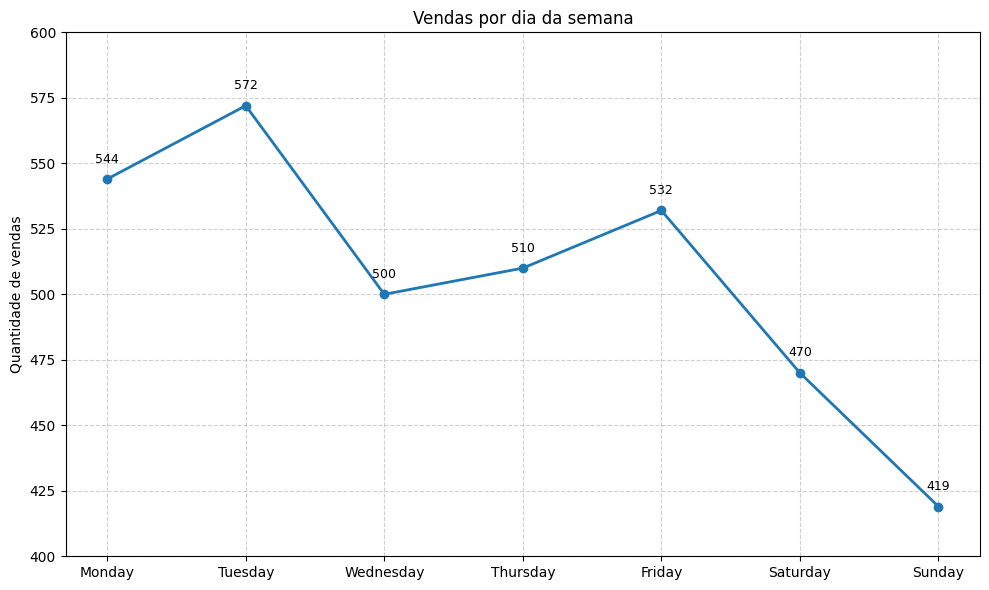

In [271]:
#VENDAS POR DIA DE SEMANA

ordem_dias = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df["weekday"] = (
    df["weekday"]
      .astype(str)
      .str.strip()
      .str.capitalize() # "monday" -> "Monday"
)

#Contagem por dia da semana (em ordem)
counts_weekday = (
    df["weekday"]
      .value_counts()
      .reindex(ordem_dias, fill_value=0)
      .astype(int)
)

#Imprimindo por dia da semana
print("\nVendas por dia da semana:\n")
print(counts_weekday.to_string(name=False, dtype=False))
print()

#Prepara DataFrame para o plot
vendas_por_dia_semana = counts_weekday.reset_index()
vendas_por_dia_semana.columns = ["weekday", "Quantidade"]

#Gráfico 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    vendas_por_dia_semana["weekday"],
    vendas_por_dia_semana["Quantidade"],
    marker="o", linestyle="-", linewidth=2
)

offset = max(vendas_por_dia_semana["Quantidade"]) * 0.009 if len(vendas_por_dia_semana) else 0.5
for i, val in enumerate(vendas_por_dia_semana["Quantidade"]):
    ax.text(i, val + offset, str(val), ha="center", va="bottom", fontsize=9)

ax.set_title("Vendas por dia da semana")
ax.set_xlabel("")
ax.set_ylabel("Quantidade de vendas")
ax.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=0)
ax.set_ylim(400, 600) 
plt.tight_layout()
plt.show()

## ✅ Conclusão 1.2
- 📅 Dias Úteis: A demanda é mais alta de segunda a sexta-feira, com forte movimento no período comercial.
- 🥇 Terça-feira: Lidera o consumo com 572 vendas, seguida por Segunda-feira (544) e Sexta-feira (532).
- 🛑 Domingo: Apresenta o menor volume de vendas (419), reflexo da menor movimentação típica do fim de semana.




Vendas por mês (independente do ano):

month_name
January      201
February     423
March        494
April        168
May          241
June         223
July         237
August       272
September    344
October      426
November     259
December     259



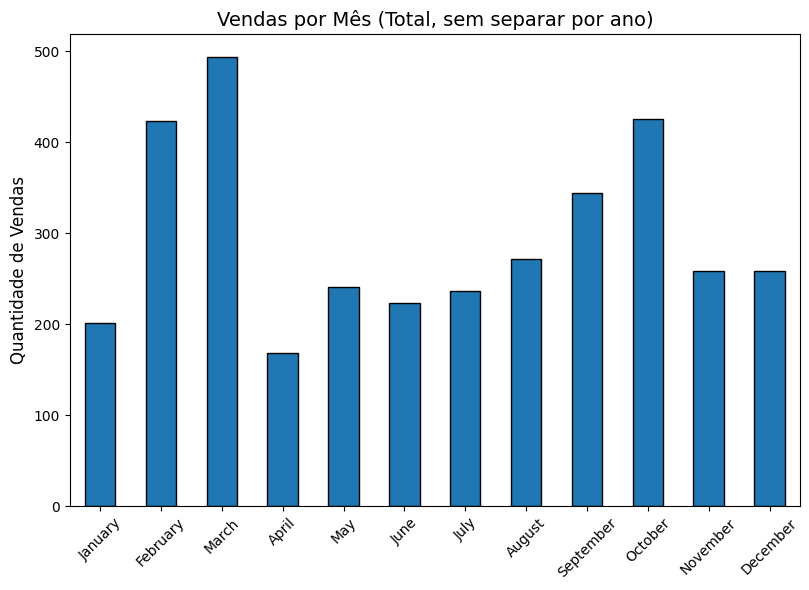


Vendas por mês × ano:

            2024   2025
January      0.0  201.0
February     0.0  423.0
March      175.0  319.0
April      168.0    0.0
May        241.0    0.0
June       223.0    0.0
July       237.0    0.0
August     272.0    0.0
September  344.0    0.0
October    426.0    0.0
November   259.0    0.0
December   259.0    0.0



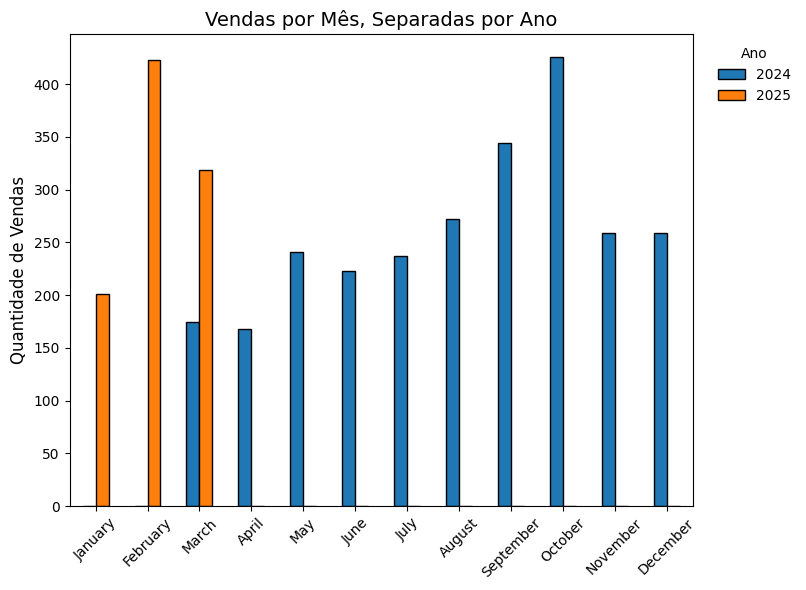

In [18]:
dt = pd.to_datetime(df["date"], errors="coerce")
df["_year"] = dt.dt.year

# Ordem correta dos meses no eixo X
months = [calendar.month_name[i] for i in range(1, 13)]
df["month_name"] = pd.Categorical(df["month_name"], categories=months, ordered=True)

years_to_show = [2024, 2025]

# Agrega por mês (independente do ano)
df_vendas_mes_total = (
    df.groupby("month_name", observed=True)
      .size()
      .reindex(months, fill_value=0)  
)

print("\nVendas por mês (independente do ano):\n")
print(df_vendas_mes_total.to_string())
print()

# Gráfico de barras (um total por mês)
ax = df_vendas_mes_total.plot(
    kind="bar", 
    edgecolor="black", 
    figsize=(10, 6)
)
ax.set_title("Vendas por Mês (Total, sem separar por ano)", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.82, 1])
plt.show()

#Agrega por mês × ano e faz pivot p/ colunas = anos
df_vendas_mes_ano = (
    df.groupby(["month_name", "_year"], observed=True)
      .size()
      .unstack("_year")                      
      .reindex(index=months) # mantém ordem de Jan..Dez
      .reindex(columns=years_to_show, fill_value=0)  # garante 2024/2025 como colunas
      .fillna(0)
)

df_vendas_mes_ano.index.name = None
df_vendas_mes_ano.columns.name = None

print("\nVendas por mês × ano:\n")
print(df_vendas_mes_ano.to_string())
print() 

#Barras agrupadas (cada mês com duas barras: 2024 e 2025)
ax = df_vendas_mes_ano.plot(kind="bar", edgecolor="black", figsize=(10, 6))
ax.set_title("Vendas por Mês, Separadas por Ano", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=45)
ax.legend(title="Ano", loc="upper left", bbox_to_anchor=(1.02, 1), frameon=False)
plt.tight_layout(rect=[0, 0, 0.82, 1])

plt.show()

## ✅ Conclusão 1.3
- 📈Sazonalmente, há alta concentração em setembro/outubro e fevereiro, sugerindo períodos-chave para campanhas promocionais e reforço de estoque. 
- ⚙️Esses padrões permitem ajustar escala de funcionários, campanhas de marketing e previsão de insumos, maximizando receitas e reduzindo desperdícios.

## 💡 Hipótese 1: 
- Usando a classificação de estações por faixas de meses, o inverno apresenta maior consumo total de café em comparação às demais estações.

In [221]:
#Garantir que o més é numérico (1..12)
df["monthsort"] = pd.to_numeric(df["monthsort"], errors="coerce")

if df["monthsort"].min() == 0 and df["monthsort"].max() <= 11:
    df["monthsort"] = df["monthsort"].replace({0: 12})

#Mapeamento mês = estação
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
     3: "Spring", 4: "Spring", 5: "Spring",
     6: "Summer", 7: "Summer", 8: "Summer",
     9: "Autumn",10: "Autumn",11: "Autumn"
}

df["season"] = df["monthsort"].map(season_map).astype("string") 


Season:

Winter     883
Spring     903
Summer     732
Autumn    1029


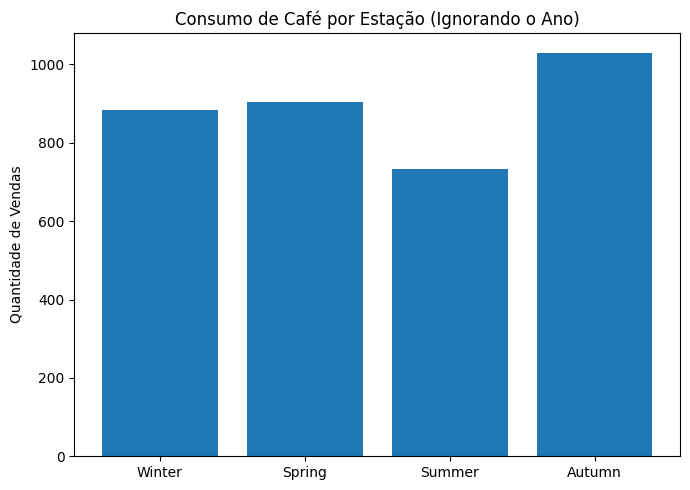

In [249]:
#Inverno: ~21 de dezembro até ~20 de março
#Primavera: ~20 de março até ~20 de junho
#Verão: ~20/21 de junho até ~22/23 de setembro
#Outono: ~22/23 de setembro até ~21 de dezembro

counts = (
    df["season"]
      .value_counts(dropna=False)
      .reindex(["Winter","Spring","Summer","Autumn"], fill_value=0)
      .astype(int)
)

print("\nSeason:\n")
for idx, val in counts.items():
    print(f"{idx:<7} {val:>6}")

plt.figure(figsize=(7,5))
plt.bar(counts.index, counts.values)
plt.title("Consumo de Café por Estação (Ignorando o Ano)")
plt.xlabel("")
plt.ylabel("Quantidade de Vendas")
plt.tight_layout()
plt.show()

## ✅ Conclusão 

- 🍂 Outono (Set–Nov): Foi a estação com maior consumo de café (mais de 1.000 vendas), superando todas as demais.
- ❄️ Inverno (Dez–Fev): Apesar da percepção comum de maior procura por bebidas quentes, ficou apenas em terceiro lugar, atrás da Primavera e do Outono.
- ☀️ Verão (Jun–Ago): Registrou o menor volume de vendas, reforçando a ideia de que temperaturas mais altas reduzem o interesse por café.



## 💡 Hipótese 2: 
- Aplicando os cortes de datas: Inverno: [21/12, 20/03) | Primavera: [20/03, 21/06) | Verão: [21/06, 22/09) | Outono: [22/09, 21/12), o inverno passa a liderar o consumo quando comparado ao outono?

## 💡 Hipótese 3:
- Separando por ano (2024 e 2025) justamente para tratar a duplicidade de março, e definindo inverno como 21/12 a 20/03 (cortando março em 20/03), o inverno ainda é a estação com maior consumo de café em cada ano? Se for, qual a diferença de registros em relação ao outono em cada ano?


Contagem por estação (utilizando a coluna 'date', sem levar em consideração o ano):

Winter    1104
Spring     689
Summer     792
Autumn     962


Contagem por estação × ano (utilizando a coluna 'date', levando em consideração o ano):

_year   2024  2025
Winter   219   885
Spring   631    58
Summer   792     0
Autumn   962     0



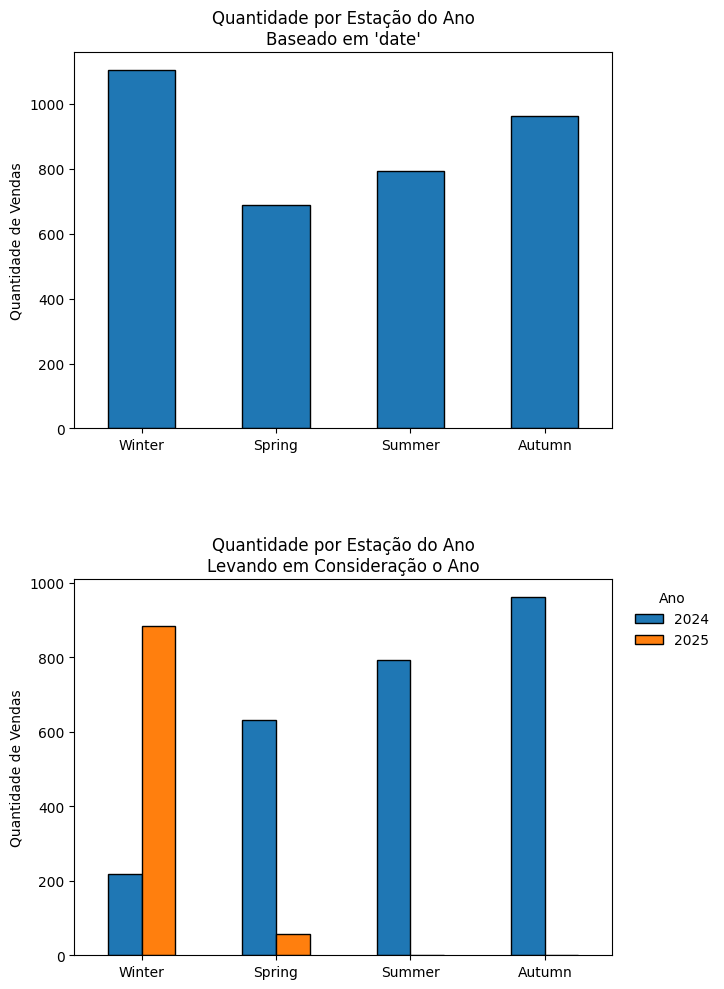

In [282]:
if not df["date"].astype(str).str.fullmatch(r"\d{4}-\d{2}-\d{2}").all():
    raise ValueError("A coluna 'date' contém valores fora do formato YYYY-MM-DD.")

dt = pd.to_datetime(df["date"], format="%Y-%m-%d", errors="raise")
df["_year"] = dt.dt.year
df["_month"] = dt.dt.month
df["_day"] = dt.dt.day

#Estações aproximadas por dia (sem timezone)

def season_from_date_naive(ts):
    m, d = ts.month, ts.day
    md = (m, d)
    
    # Winter: [21/12, 20/03)
    # Spring: [20/03, 21/06)
    # Summer: [21/06, 22/09)
    # Autumn: [22/09, 21/12)
    
    if md >= (12, 21) or md < (3, 20):
        return "Winter"
    elif (3, 20) <= md < (6, 21):
        return "Spring"
    elif (6, 21) <= md < (9, 22):
        return "Summer"
    else:
        return "Autumn"

df["season_astro"] = dt.map(season_from_date_naive)
season_dtype = CategoricalDtype(["Winter","Spring","Summer","Autumn"], ordered=True)
df["season_astro"] = df["season_astro"].astype(season_dtype)


# Contagem por estação (ignora ano)
counts_season = (
    df["season_astro"]
      .value_counts()
      .reindex(season_dtype.categories, fill_value=0)
      .astype(int)
)

print("\nContagem por estação (utilizando a coluna 'date', sem levar em consideração o ano):\n")
print(counts_season.to_string(name=False, dtype=False), end="\n\n")

# Contagem por estação × ano (Compara mar/2024 vs mar/2025, etc.)
counts_season_year = (
    df.groupby(["season_astro","_year"], observed=True)
      .size()
      .unstack("_year", fill_value=0)
      .reindex(index=season_dtype.categories)
      .fillna(0)
      .astype(int)
)

print("\nContagem por estação × ano (utilizando a coluna 'date', levando em consideração o ano):\n")
print(counts_season_year.to_string(), end="\n\n") 

fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(9, 10),              
    constrained_layout=False     
)

# Gráfico 1: barras por estação (ignora ano)
counts_season.plot(kind="bar", edgecolor="black", ax=ax1)
ax1.set_title("Quantidade por Estação do Ano\nBaseado em 'date'")
ax1.set_xlabel("")
ax1.set_ylabel("Quantidade de Vendas")
ax1.tick_params(axis="x", rotation=0)

# Gráfico 2: barras agrupadas por estação × ano
counts_season_year.plot(kind="bar", edgecolor="black", ax=ax2)
ax2.set_title("Quantidade por Estação do Ano\nLevando em Consideração o Ano")
ax2.set_xlabel("")
ax2.set_ylabel("Quantidade de Vendas")
ax2.tick_params(axis="x", rotation=0)
ax2.legend(title="Ano", loc="upper left", bbox_to_anchor=(1.02, 1), frameon=False)
plt.tight_layout(rect=[0, 0, 0.82, 1])

# Espaçamento vertical entre os dois subplots
fig.subplots_adjust(hspace=0.4)  # ↑ aumente/diminua conforme preferir (0.3–0.7)
plt.show()

## ✅ Conclusão: Hipótese 2
- ❄️ Inverno: 1.104 registros, superando o Outono e assumindo a liderança de consumo.
- 🍂 Outono: 962 registros, mostrando que a percepção inicial de liderança muda com o corte correto das datas.
- 🌸 Primavera: 689 registros, indicando menor sazonalidade.
- ☀️ Verão: 792 registros, também com menor impacto na sazonalidade.
- 📊 Insight geral: A forma de agrupamento das datas impacta fortemente a interpretação, e o maior consumo ocorre nos meses frios (jan–mar e dez).

## ✅ Conclusão: Hipótese 3


- 🗓️ Análise total (2024 + 2025):     Ao analisar se o Inverno é o líder no conjunto total de dados (2024 + 2025), precisamos somar os registros de inverno de cada ano.  

- ❄️ Inverno 2024 + 2025:  
  2024: 219  
  2025: 885  
  Total: 219 + 885 = 1.104  

- 🍂 Outono (total agregado): 962  

- 🏆 Resultado agregado:  
  Inverno (1.104) > Outono (962) → Inverno lidera, diferença de 1.104 - 962 = 142 vendas ❄️➡️🏆  

- 🔍 Observação ano a ano:  
  2024: Outono 962 > Inverno 219 → Outono lidera (diferença 743)  
  2025 (até então): Inverno 885 > Outono 0 → Inverno lidera (diferença 885)  

- 📌 Insight: A escolha do recorte importa, pois ano a ano o vencedor muda, mas agregando os dois anos, o Inverno é o líder total da amostra.


## 💡 Hipótese 4: 
- Entre manhã, tarde e noite, quais são os 5 tipos de café mais vendidos em cada turno e como muda o ranking entre os turnos?



Vendas por turno e tipo de café:

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  Espresso  Hot Chocolate  Latte
time_of_day                                                                                            
Morning            219                  331         122     58      143        44             49    215
Afternoon          233                  239         164     75       88        56             80    270
Night              112                  239         200    106       56        29            147    272



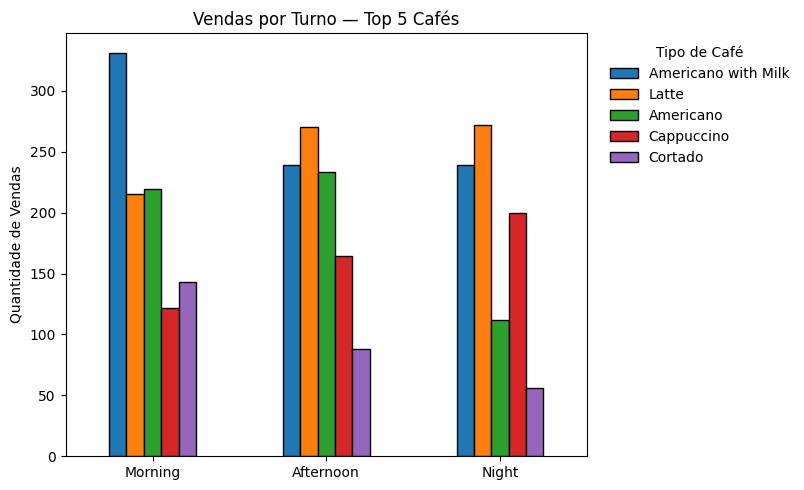

In [253]:
# normaliza (tira espaços, capitaliza)
df["time_of_day"] = (
    df["time_of_day"]
      .astype(str)
      .str.strip()
      .str.capitalize()
)

ordem_turnos = ["Morning", "Afternoon", "Night"]

cat_turnos = CategoricalDtype(categories=ordem_turnos, ordered=True)
df["time_of_day"] = df["time_of_day"].astype(cat_turnos)

# Tabela completa só para inspeção
vendas_por_turno_tipo_cafe = (
    df.groupby(["time_of_day","coffee_name"], observed=True)
      .size()
      .reset_index(name="vendas")
)

pivot_full = (
    vendas_por_turno_tipo_cafe
      .pivot(index="time_of_day", columns="coffee_name", values="vendas")
      .sort_index()         
      .fillna(0)
)

print("\nVendas por turno e tipo de café:\n")
print(pivot_full.to_string(max_cols=None, line_width=200), end="\n\n")

# Top-N cafés

N = 5
topN = (
    df.groupby("coffee_name", observed=True)
      .size()
      .sort_values(ascending=False)
      .head(N)
      .index
)

pivot_top = (
    df[df["coffee_name"].isin(topN)]
      .groupby(["time_of_day","coffee_name"], observed=True)
      .size()
      .unstack("coffee_name", fill_value=0)
      .reindex(index=ordem_turnos)                
      .reindex(columns=topN, fill_value=0)        
)

ax = pivot_top.plot(kind="bar", figsize=(10,5), edgecolor="black")
ax.set_title(f"Vendas por Turno — Top {N} Cafés")
ax.set_xlabel("")
ax.set_ylabel("Quantidade de Vendas")
plt.xticks(rotation=0)
ax.legend(title="Tipo de Café", loc="upper left", bbox_to_anchor=(1.02, 1), frameon=False)
plt.tight_layout(rect=[0, 0, 0.82, 1])
plt.show()

## ✅ Conclusão 
- 🌅 Manhã: Consumo dominado por cafés simples e energéticos (Americano, Americano with Milk), refletindo a busca por praticidade e energia para iniciar o dia.
- ☀️ Tarde: Maior diversidade no consumo, com equilíbrio entre opções tradicionais e mais elaboradas, destacando-se Latte e Cappuccino como escolhas populares no período de pausa.
- 🌙 Noite: Preferência por cafés mais encorpados e indulgentes (Cappuccino, Latte), enquanto os cafés puros perdem força, evidenciando um consumo mais ligado ao conforto e sabor do que à energia.

In [13]:
#Atualiza CSV tratado / com novas colunas

df.to_csv("Coffe_sales_tratado3.csv", index=False)